# Loan Prediction Model Using Logistic Regression
Dataset: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset <br>
Writer: Bobby Ravel Moreno <br>

My Linkedin: <br>
https://www.linkedin.com/in/bobby-ravel-moreno-01b5101a4/

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
train_data = pd.read_csv('train.csv', sep=',')

In [3]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Feature Analysis

In [4]:
# Import libraries for analysis
import scipy.stats as ss
import scipy.special as sp
from scipy.stats import skew, norm

In [5]:
# Drop ID column since its not needed for analysis
train_data = train_data.drop('Loan_ID', axis=1)

In [6]:
# Describe numerical features in dataset
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Check for each features data type
train_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# Set Credit_History as categorical feature since it only contains 0/1 which is basically Yes/No
train_data['Credit_History'] = train_data['Credit_History'].astype('O')

In [9]:
# Separate numerical and categorical features
cat_col = []
num_col = []

for idx,value in enumerate(train_data.dtypes):
    if value == object:
        cat_col.append(train_data.iloc[:, idx])
    else:
        num_col.append(train_data.iloc[:, idx])

In [10]:
cat_col

[0        Male
 1        Male
 2        Male
 3        Male
 4        Male
         ...  
 609    Female
 610      Male
 611      Male
 612      Male
 613    Female
 Name: Gender, Length: 614, dtype: object,
 0       No
 1      Yes
 2      Yes
 3      Yes
 4       No
       ... 
 609     No
 610    Yes
 611    Yes
 612    Yes
 613     No
 Name: Married, Length: 614, dtype: object,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 609     0
 610    3+
 611     1
 612     2
 613     0
 Name: Dependents, Length: 614, dtype: object,
 0          Graduate
 1          Graduate
 2          Graduate
 3      Not Graduate
 4          Graduate
            ...     
 609        Graduate
 610        Graduate
 611        Graduate
 612        Graduate
 613        Graduate
 Name: Education, Length: 614, dtype: object,
 0       No
 1       No
 2      Yes
 3       No
 4       No
       ... 
 609     No
 610     No
 611     No
 612     No
 613    Yes
 Name: Self_Employed, Length: 614, dtyp

In [11]:
num_col

[0      5849
 1      4583
 2      3000
 3      2583
 4      6000
        ... 
 609    2900
 610    4106
 611    8072
 612    7583
 613    4583
 Name: ApplicantIncome, Length: 614, dtype: int64,
 0         0.0
 1      1508.0
 2         0.0
 3      2358.0
 4         0.0
         ...  
 609       0.0
 610       0.0
 611     240.0
 612       0.0
 613       0.0
 Name: CoapplicantIncome, Length: 614, dtype: float64,
 0        NaN
 1      128.0
 2       66.0
 3      120.0
 4      141.0
        ...  
 609     71.0
 610     40.0
 611    253.0
 612    187.0
 613    133.0
 Name: LoanAmount, Length: 614, dtype: float64,
 0      360.0
 1      360.0
 2      360.0
 3      360.0
 4      360.0
        ...  
 609    360.0
 610    180.0
 611    360.0
 612    360.0
 613    360.0
 Name: Loan_Amount_Term, Length: 614, dtype: float64]

In [12]:
cat_data = pd.DataFrame(cat_col).transpose()
num_data = pd.DataFrame(num_col).transpose()

In [13]:
# Set all numerical features to float64 for easier handling
num_data = num_data.astype('float64')

In [14]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [15]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


### Analyse Categorical Features

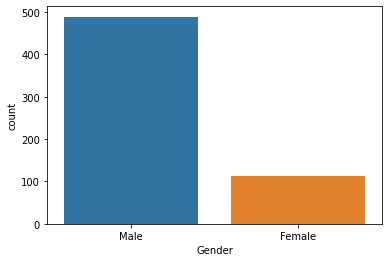

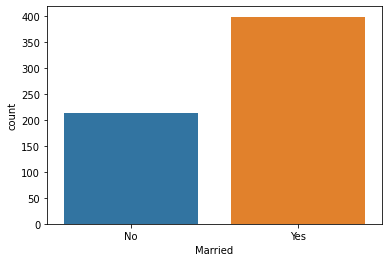

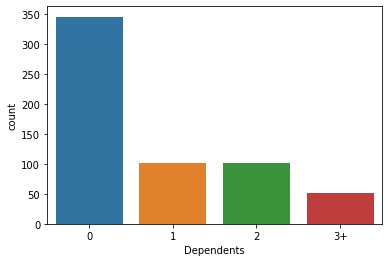

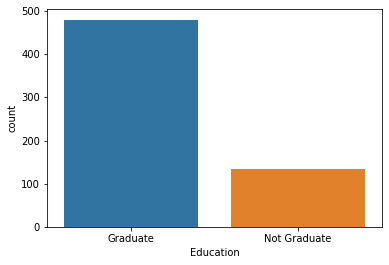

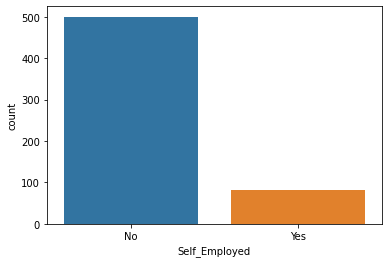

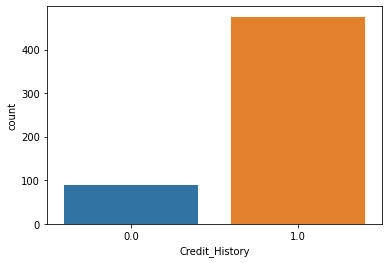

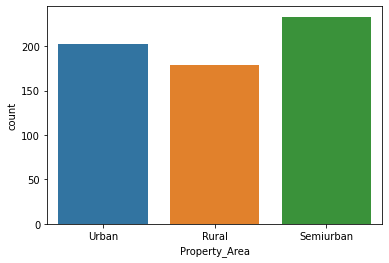

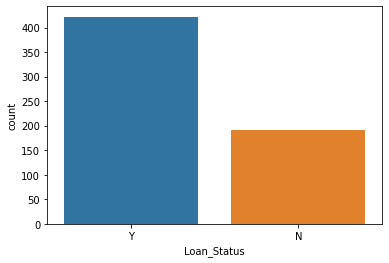

<Figure size 432x288 with 0 Axes>

In [16]:
# Visualize each categorical feature based on variance in them
for col in cat_data.columns:
    sns.countplot(cat_data[col])
    plt.figure()

Based on graphs above, I can conclude this data is biased towards male, graduated, employed, and people who has credit history. <br>
Most loans in dataset have also been approved.

In [17]:
cat_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Plot each feature with label

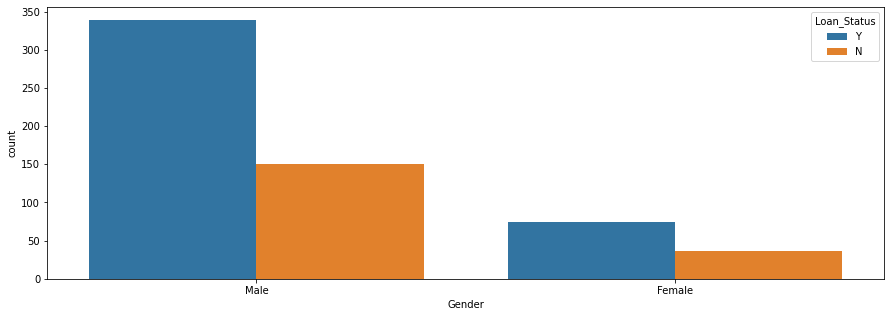

In [18]:
# Gender
plt.figure(figsize=(15,5))
sns.countplot(x='Gender', hue='Loan_Status', data=cat_data);

Based on graph above, we can see there is no clear pattern between Male or Female.<br>
We also know from before that our data is biased towards male, therefore it can't be concluded that gender is a feature we need.

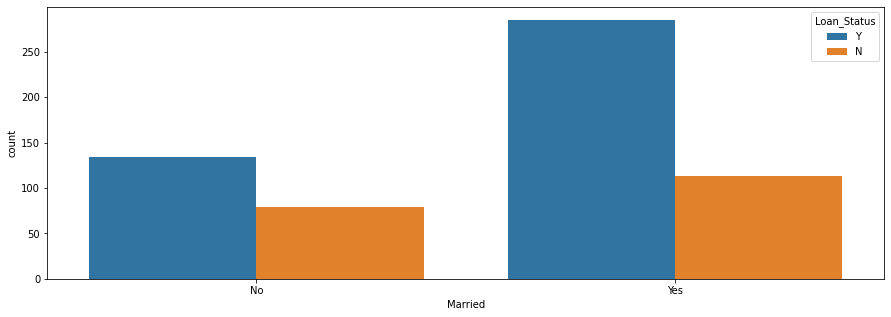

In [19]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=cat_data);

We can see clear pattern here, where people who are married are more likely to gain approval.

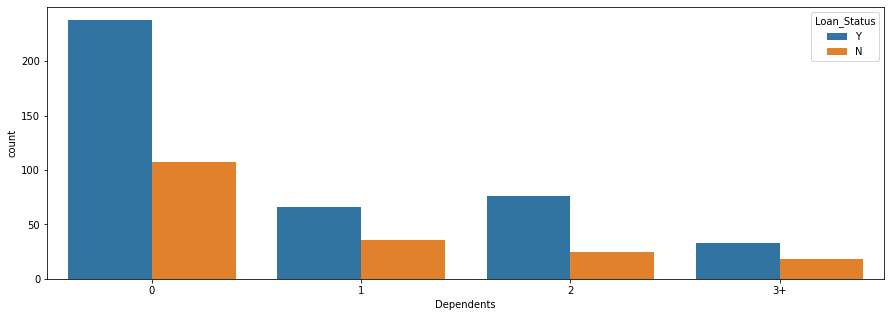

In [20]:
# Dependents
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=cat_data);

We can see a pattern here, where people who has no dependents are more likely to gain approval.

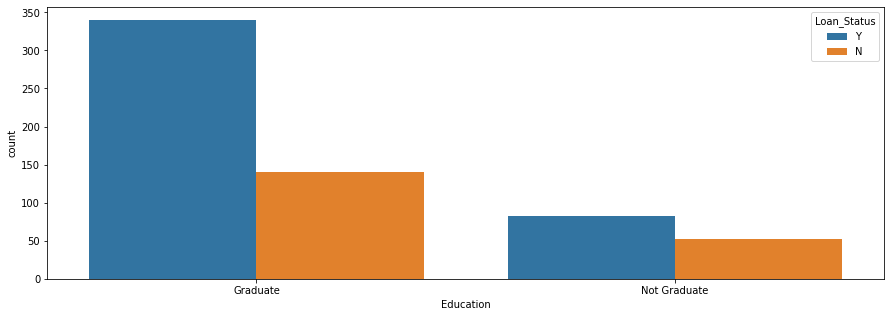

In [21]:
# Education
plt.figure(figsize=(15,5))
sns.countplot(x='Education', hue='Loan_Status', data=cat_data);

There is no clear pattern between Graduate and Not Graduate, therefore we can conlude we don't need this feature.

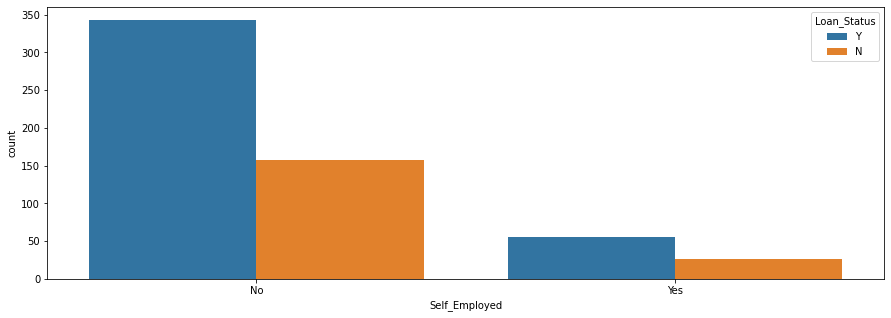

In [22]:
# Self Employed
plt.figure(figsize=(15,5))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=cat_data);

There is no clear pattern between Employed and Self Employed, therefore we can conlude we don't need this feature.

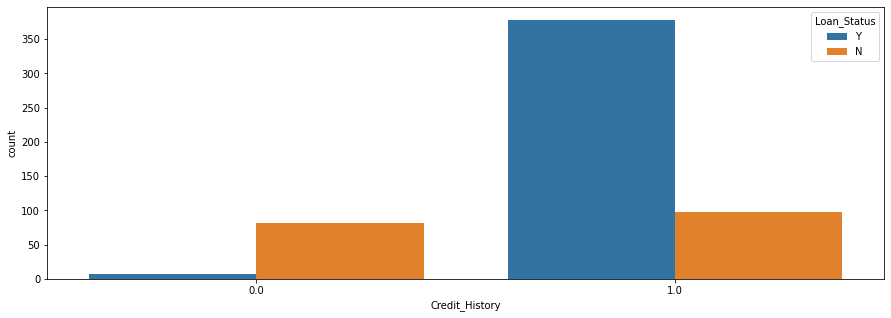

In [23]:
# Credit History
plt.figure(figsize=(15,5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=cat_data);

We can see clear pattern here, where people who has Credit History are more likely to gain approval.

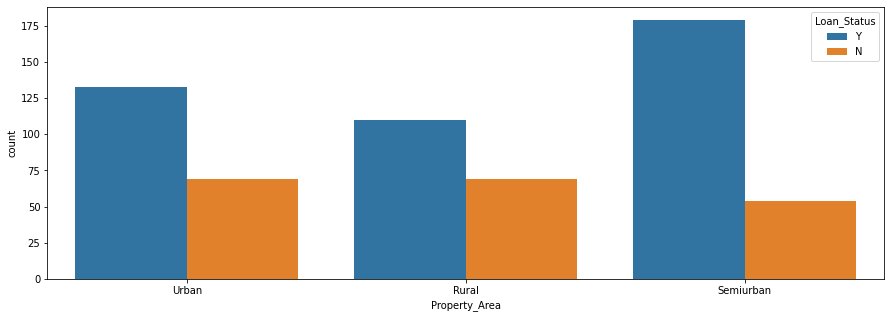

In [24]:
# Property Area
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=cat_data);

We can see clear pattern here, where people who live in Semiurban area are more likely to gain approval.

Categorical features we need:
1. Married
2. Dependents
3. Credit History
4. Property Area

### Analyse Numerical Features

Skewness of ApplicantIncome :  6.539513113994625
Kurtosis of ApplicantIncome :  60.54067593369113
Skewness of CoapplicantIncome :  7.491531216657306
Kurtosis of CoapplicantIncome :  84.95638421103374
Skewness of LoanAmount :  2.677551679256059
Kurtosis of LoanAmount :  10.40153349029416
Skewness of Loan_Amount_Term :  -2.362414124216269
Kurtosis of Loan_Amount_Term :  6.673473692814259


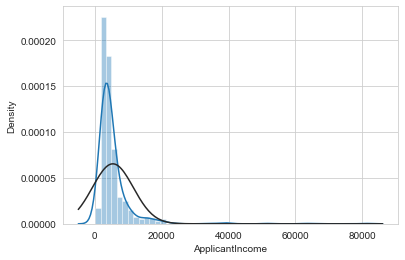

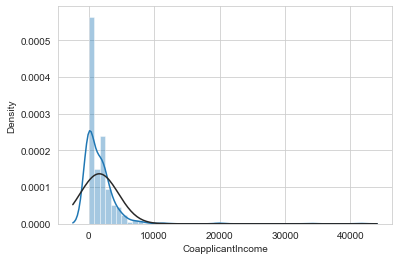

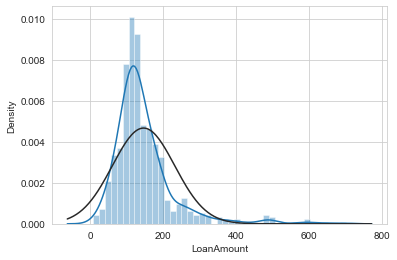

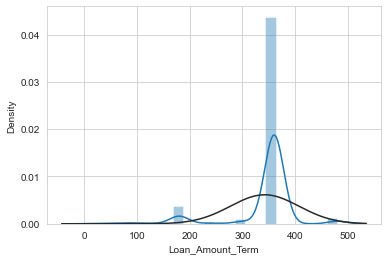

In [25]:
# Visualize skewness and kurtosis of each feature
for col in num_data:
    print('Skewness of', col, ': ', num_data[col].skew());
    print('Kurtosis of', col, ': ', num_data[col].kurtosis());
    print('================================================')
    
    sns.set_style('whitegrid')
    plt.figure();
    sns.distplot(num_data[col], fit=norm);

From the graph above we can see that ApplicantIncome, CoApplicantIncome, and LoanAmount is positively skewed. Which means we need to normalize the data. <br>

The high kurtosis value means there are many outliers. <br>

For handling outlier and normalize we can use Log Transformation.

# Data Preparation

In [26]:
# Import libraries
from sklearn.preprocessing import LabelEncoder

### Handle missing value

In [27]:
# Look for missing values
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [29]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [30]:
# Handle missing value for categorical data
# Fill the missing value with the most frequent value of each feature
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Check for missing value
cat_data.isnull().sum().any()

False

In [31]:
# Handle missing value for numerical data
# Fill the missing value with the mean value of each feature
num_data = num_data.apply(lambda x:x.fillna(x.mean()))

# Check for missing value
num_data.isnull().sum().any()

False

In [32]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [33]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,146.412162,360.0
1,4583.0,1508.0,128.000000,360.0
2,3000.0,0.0,66.000000,360.0
3,2583.0,2358.0,120.000000,360.0
4,6000.0,0.0,141.000000,360.0


### Label Encode Categorical Features

In [34]:
# Eliminate unnecessary features
cat_data = cat_data[['Married', 'Dependents', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [35]:
# Encode categorical data so it can be fit to training model
encoder = LabelEncoder()

cat_data = cat_data.apply(encoder.fit_transform, axis=0)

In [36]:
# Gender: 0 (female) : 1 (male)
# Married: 0 (No) : 1 (Yes)
# Dependents: 0 (0) : 1 (1) : 2(2) : 3(3+)
# Education: 0 (Graduate) : 1 (Not Graduate)
# Self_Employed: 0 (No) : 1 (Yes)
# Credit_History: 1 (1) : 0 (0)
# Property_Area: 0 (Rural) : 1 (SemiUrban) : 2 (Urban)
# Loan_Status: 0 (No) : 1 (Yes)

cat_data.head()

,Married,Dependents,Credit_History,Property_Area,Loan_Status
0,0,0,1,2,1
1,1,1,1,0,0
2,1,0,1,2,1
3,1,0,1,2,1
4,0,0,1,2,1


### Normalization and Handling Outlier

In [37]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,146.412162,360.0
1,4583.0,1508.0,128.000000,360.0
2,3000.0,0.0,66.000000,360.0
3,2583.0,2358.0,120.000000,360.0
4,6000.0,0.0,141.000000,360.0


In [38]:
# We use log(x+1) to avoid negative infinity

# num_data = num_data.apply(lambda x: np.log(x+1))
num_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = num_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].apply(lambda x: np.log(x+1))

In [39]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,8.674197,0.000000,4.993232,360.0
1,8.430327,7.319202,4.859812,360.0
2,8.006701,0.000000,4.204693,360.0
3,7.857094,7.765993,4.795791,360.0
4,8.699681,0.000000,4.955827,360.0


Skewness of ApplicantIncome :  0.4821279953732817
Kurtosis of ApplicantIncome :  3.678710687140339
Skewness of CoapplicantIncome :  -0.17307327599230946
Kurtosis of CoapplicantIncome :  -1.9111990586193355
Skewness of LoanAmount :  -0.17971342301015458
Kurtosis of LoanAmount :  2.655544081944088
Skewness of Loan_Amount_Term :  -2.3896799467122745
Kurtosis of Loan_Amount_Term :  6.897995269508927


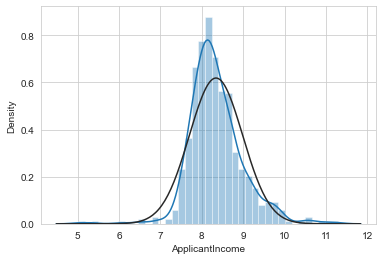

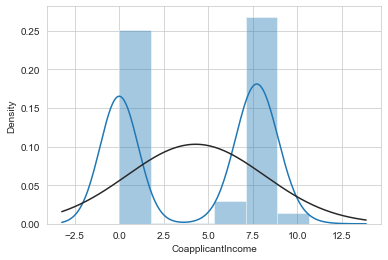

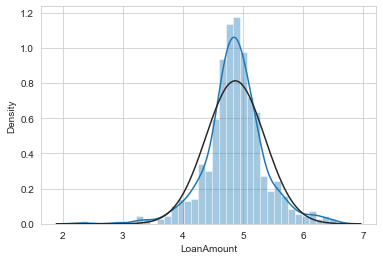

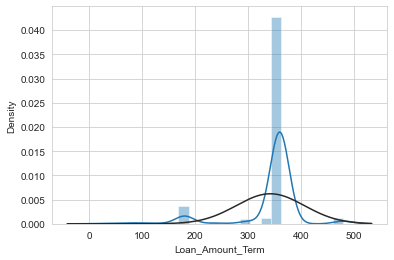

In [40]:
for col in num_data:
    print('Skewness of', col, ': ', num_data[col].skew());
    print('Kurtosis of', col, ': ', num_data[col].kurtosis());
    print('================================================')
    
    sns.set_style('whitegrid')
    plt.figure();
    sns.distplot(num_data[col], fit=norm);

Now we have data with fairly normal distribution and minimum outlier.

# Feature Selection

In [41]:
# Merge transformed categorical and numerical data into one dataset
trans_train_data = pd.concat([num_data, cat_data], axis=1)

In [42]:
trans_train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Married,Dependents,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341510,4.290129,4.870872,342.000000,0.653094,0.744300,0.855049,1.037459,0.687296
std,0.645035,3.875873,0.491376,64.372489,0.476373,1.009623,0.352339,0.787482,0.463973
min,5.017280,0.000000,2.302585,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.965024,0.000000,4.617584,360.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.246303,7.081125,4.867534,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,8.664922,7.739897,5.110477,360.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,11.302217,10.637489,6.552508,480.000000,1.000000,3.000000,1.000000,2.000000,1.000000


In [43]:
trans_train_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Married', 'Dependents', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

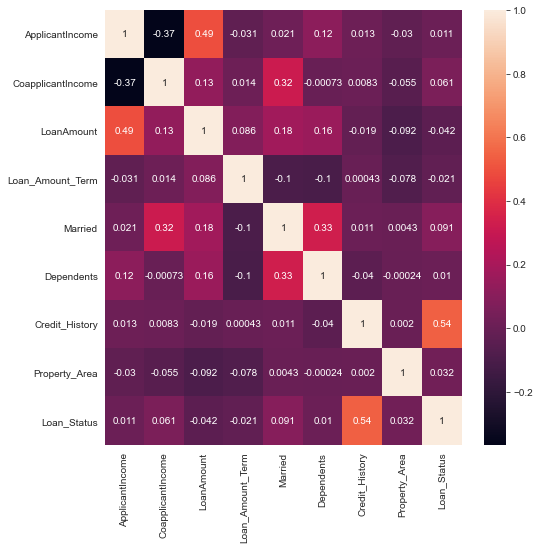

In [44]:
# Finding correlation
correlation = trans_train_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True);

Based on graph above we can see how the categorical features we chose have positive correlation with label(Loan Status). As for the numerical features only ApplicantIncome and CoapplicantIncome have positive correlation.

In [45]:
# Split features and label
X_train = trans_train_data[['ApplicantIncome', 'CoapplicantIncome', 'Married', 'Dependents', 'Credit_History', 'Property_Area']]
Y_train = trans_train_data[['Loan_Status']]

In [46]:
X_train

,ApplicantIncome,CoapplicantIncome,Married,Dependents,Credit_History,Property_Area
0,8.674197,0.000000,0,0,1,2
1,8.430327,7.319202,1,1,1,0
2,8.006701,0.000000,1,0,1,2
3,7.857094,7.765993,1,0,1,2
4,8.699681,0.000000,0,0,1,2
...,...,...,...,...,...,...
609,7.972811,0.000000,0,0,1,0
610,8.320448,0.000000,1,3,1,0
611,8.996280,5.484797,1,1,1,2
612,8.933796,0.000000,1,2,1,2


In [47]:
Y_train

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Training Model

In [48]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()

Since we are doing binary classification, we will use Logistic Regression model.

In [49]:
# Fit model
model = model.fit(X_train, Y_train)

# Evaluate Model

In [50]:
# Import libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
# Predict result
Y_pred = model.predict(X_train)

In [52]:
print('Accuracy Score: {}'.format(accuracy_score(Y_train, Y_pred)));
print('Precision Score: {}'.format(precision_score(Y_train, Y_pred)));
print('Recall Score: {}'.format(recall_score(Y_train, Y_pred)));
print('F1 Score: {}'.format(f1_score(Y_train, Y_pred)));

Accuracy Score: 0.8094462540716613
Precision Score: 0.7904761904761904
Recall Score: 0.9834123222748815
F1 Score: 0.8764519535374867


Model above has accuracy of 80%, which is pretty decent. Our model was able to correctly predict most of the case.

# Test Model

In [53]:
# Load test data
test_data = pd.read_csv('test.csv', sep=',')

In [54]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [55]:
test_data.shape

(367, 12)

In [56]:
# Drop ID column
test_data = test_data.drop('Loan_ID', axis=1)

In [57]:
# Look for missing value
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [58]:
# Drow all row with missing value
test_data = test_data.dropna()

In [59]:
test_data.shape

(289, 11)

In [60]:
# Check for missing value
test_data.isnull().sum().any()

False

In [61]:
# Label encode categorical features so we can fit the data to model
cat_test = test_data[['Married', 'Dependents', 'Credit_History', 'Property_Area']].apply(encoder.fit_transform, axis=0)

In [62]:
cat_test.head()

,Married,Dependents,Credit_History,Property_Area
0,1,0,1,2
1,1,1,1,2
2,1,2,1,2
4,0,0,1,2
5,1,0,1,2


In [63]:
num_test = test_data[['ApplicantIncome', 'CoapplicantIncome']]

In [64]:
num_test.head()

,ApplicantIncome,CoapplicantIncome
0,5720,0
1,3076,1500
2,5000,1800
4,3276,0
5,2165,3422


In [65]:
# We will only take necessary features
trans_test_data = pd.concat([cat_test, num_test], axis=1)

In [66]:
trans_test_data.head()

,Married,Dependents,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome
0,1,0,1,2,5720,0
1,1,1,1,2,3076,1500
2,1,2,1,2,5000,1800
4,0,0,1,2,3276,0
5,1,0,1,2,2165,3422


In [67]:
trans_test_data.shape

(289, 6)

In [68]:
# Apply model on test data
Y_test = model.predict(trans_test_data)

In [69]:
res = {'Loan_Status_Prediction':Y_test}

In [70]:
test_res = pd.DataFrame(res)

In [71]:
test_res.head()

,Loan_Status_Prediction
0,1
1,1
2,1
3,1
4,1


In [72]:
test_res.shape

(289, 1)

In [73]:
# Merge prediction result with test data
rev_res = pd.concat([trans_test_data.reset_index(), test_res.reset_index()], axis=1) # We use reset.index() to avoid NaN from concatenating dataframes

In [74]:
rev_res.head()

,index,Married,Dependents,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,index,Loan_Status_Prediction
0,0,1,0,1,2,5720,0,0,1
1,1,1,1,1,2,3076,1500,1,1
2,2,1,2,1,2,5000,1800,2,1
3,4,0,0,1,2,3276,0,3,1
4,5,1,0,1,2,2165,3422,4,1
